In [124]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns',200)

In [125]:
df=pd.read_csv('C:/Users/LENOVO X260/Desktop/seyi/coaster_db.csv')

Understanding Roller coaster dataset

In [126]:
df

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,...,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,...,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,...,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN


In [127]:
df=df[['coaster_name', 
     #'Length', 'Speed', 
     'Location', 'Status', 
     #'Opening date',
      # 'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 
     #'Lift/launch system', 'Cost', 'Trains', 'Park section',
     #  'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
     #  'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
      # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
      # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 
     'Type_Main',
       'opening_date_clean', 
    # 'speed1', 'speed2', 
     'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 
     #'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [128]:
df.shape

(1087, 15)

In [129]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Inversions            float64
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed1_value          float64
speed1_unit            object
speed_mph             float64
height_value          float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [130]:
# for date time function 
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [131]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Inversions                   float64
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed1_value                 float64
speed1_unit                   object
speed_mph                    float64
height_value                 float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

# Rename our columns for better understanding 

In [132]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Inversions', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean',
       'speed1_value', 'speed1_unit', 'speed_mph', 'height_value',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [133]:
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [134]:
# Checking for null or missing values 
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Inversions         155
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
speed1_value       150
speed1_unit        150
Speed_mph          150
height_value       122
Inversions           0
Gforce             725
dtype: int64

In [135]:
df

,Coaster_Name,Location,Status,Inversions,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed1_value,speed1_unit,Speed_mph,height_value,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,mph,6.0,50.0,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,1.0,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,1.0,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,1.0,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,3.0,2022,NaN,NaN,Steel,NaT,53.0,mph,53.0,111.0,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,2.0,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,mph,73.0,178.0,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,0.0,2022,NaN,NaN,Steel,2016-06-16,59.3,mph,59.3,78.1,0,4.0
1085,Tumbili,Kings Dominion,Under construction,0.0,2022,NaN,NaN,Steel,NaT,34.0,mph,34.0,112.0,0,NaN


In [136]:
# to identify and return rows in a Pandas DataFrame that are duplicates based on all columns.
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Inversions,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed1_value,speed1_unit,Speed_mph,height_value,Inversions,Gforce


In [137]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [138]:
# Check for duplicate coaster name
a = df.loc[df.duplicated(subset=['Coaster_Name'])]
a.head(10)

,Coaster_Name,Location,Status,Inversions,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed1_value,speed1_unit,Speed_mph,height_value,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,mph,60.0,96.0,0,4.0
60,Derby Racer,Revere Beach,Removed,0.0,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,0.0,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,mph,50.0,77.0,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,0.0,1980,NaN,NaN,Steel,NaT,35.0,mph,35.0,104.0,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,0.0,1986,43.8427,-79.5423,Steel,1981-05-23,64.0,km/h,39.8,10.0,0,NaN
239,La Vibora,Other,NaN,0.0,1986,NaN,NaN,Steel,NaT,32.0,mph,32.0,60.0,0,NaN
241,Big Thunder Mountain Railroad,Other,NaN,0.0,1987,NaN,NaN,Steel,NaT,35.0,mph,35.0,104.0,0,NaN
252,La Vibora,Other,NaN,0.0,1987,NaN,NaN,Steel,NaT,32.0,mph,32.0,60.0,0,NaN
262,Flashback (Six Flags Magic Mountain),Other,NaN,0.0,1988,NaN,NaN,Steel,NaT,35.0,mph,35.0,86.0,0,3.0
270,Alpine Bobsled,Other,NaN,0.0,1989,NaN,NaN,Steel,NaT,35.0,mph,35.0,64.0,0,NaN


In [139]:
# Checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Inversions,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed1_value,speed1_unit,Speed_mph,height_value,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,NaN,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,mph,60.0,96.0,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,mph,60.0,96.0,0,4.0


In [140]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Inversions', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'speed1_value',
       'speed1_unit', 'Speed_mph', 'height_value', 'Inversions', 'Gforce'],
      dtype='object')

In [141]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])] \
    .reset_index(drop=True).copy()

In [142]:
df.head()

,Coaster_Name,Location,Status,Inversions,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed1_value,speed1_unit,Speed_mph,height_value,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,mph,6.0,50.0,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,1.0,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,1.0,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,1.0,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,1,NaN


# Step 3 - Understanding features

Plotting distributuins\
Histogram\
KDE plot\
Boxplot\

In [143]:
df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

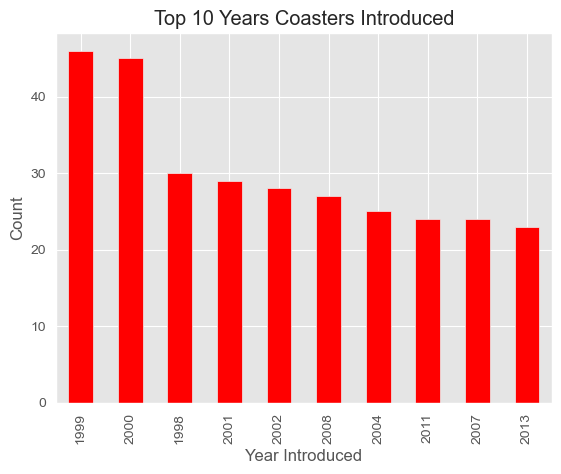

In [144]:
## For boxplot 

ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced', color='red')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

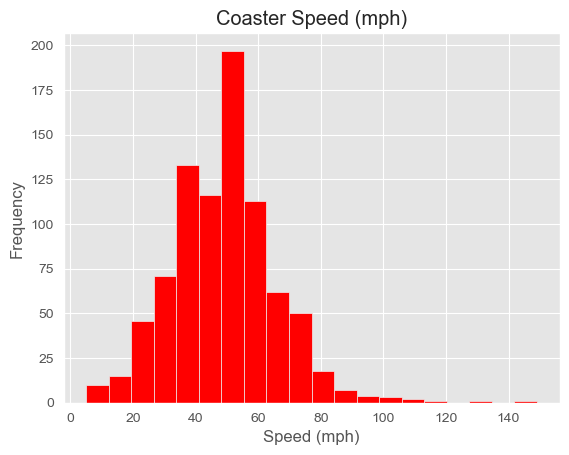

In [145]:
# for histogram 
ax = df['Speed_mph'].plot(kind='hist',
                          bins=20,
                          title='Coaster Speed (mph)',
                        color = 'red')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

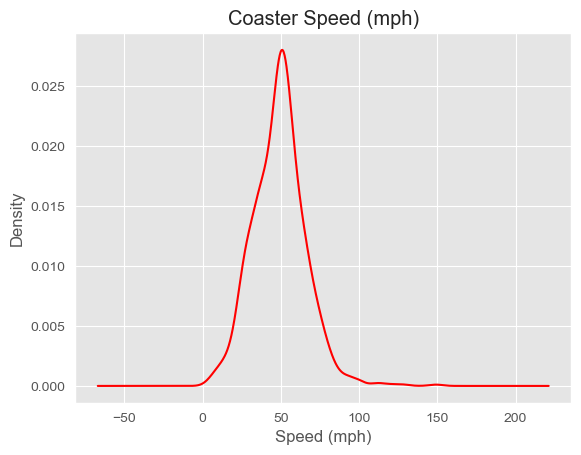

In [146]:
# KDE plot 
ax = df['Speed_mph'].plot(kind='kde',
                          title='Coaster Speed (mph)',
                          color = 'red')
ax.set_xlabel('Speed (mph)')

# Understanding Feature relationship¶
Scatterplot\
Heatmap Correlation\
Pairplot\
Groupby comparisons\

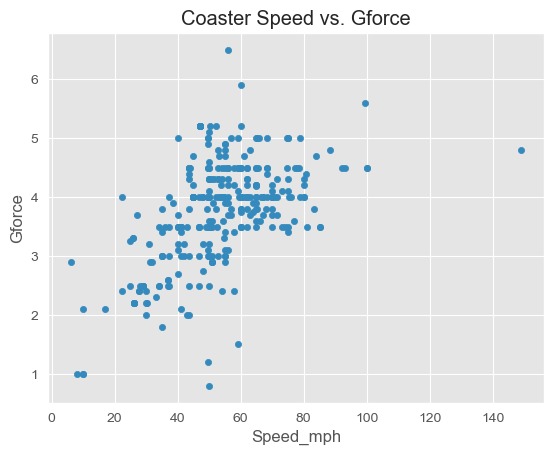

In [147]:
# for scatterplot
df.plot(kind='scatter',
        x='Speed_mph',
        y='Gforce',
        title='Coaster Speed vs. Gforce')
plt.show()

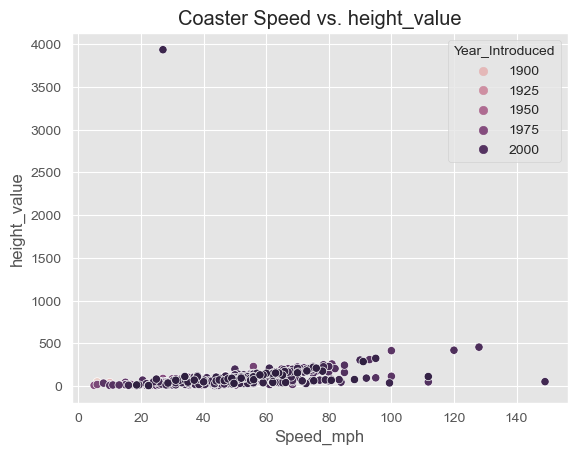

In [148]:
ax = sns.scatterplot(x='Speed_mph',
                y='height_value',
                hue='Year_Introduced',
                data=df)
ax.set_title('Coaster Speed vs. height_value')
plt.show()

In [149]:
# finding co-relation between following columns 
df_corr = df[['Year_Introduced','Speed_mph',
    #'Height_ft',
              'Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Inversions,Inversions,Gforce
Year_Introduced,1.000000,0.208507,0.125260,0.125260,0.080185
Speed_mph,0.208507,1.000000,0.103886,0.103886,0.467064
Inversions,0.125260,0.103886,1.000000,1.000000,0.402441
Inversions,0.125260,0.103886,1.000000,1.000000,0.402441
Gforce,0.080185,0.467064,0.402441,0.402441,1.000000


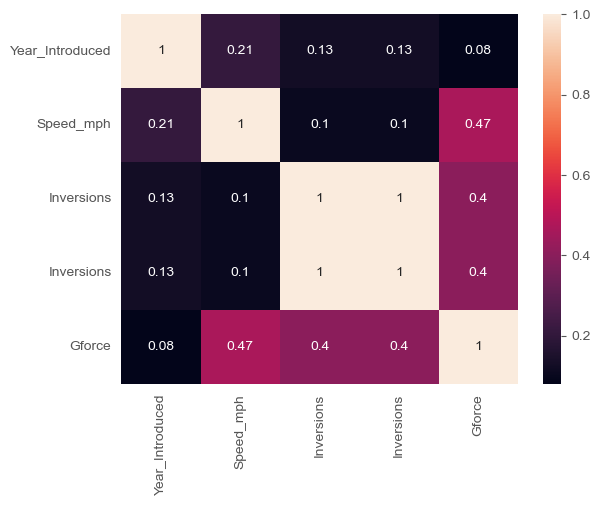

In [150]:
#we use heatmap for better understanding of co-relation 
ax=sns.heatmap(df_corr, annot=True)

Getting answer for the row 10 fastest roller coaster

Text(0.5, 0, 'Avg. Coaster Speed')

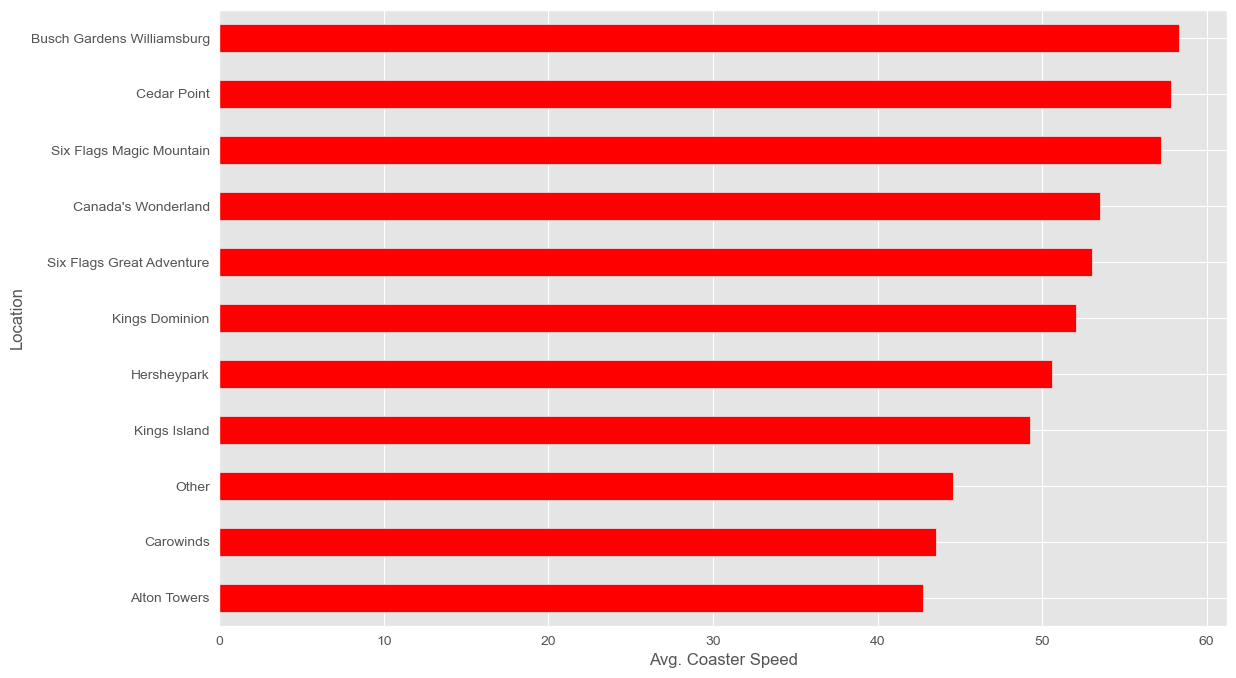

In [151]:
ax = df.query('Location != "other"').groupby('Location')['Speed_mph'].agg(['mean','count']).query('count>=10').sort_values('mean')['mean']\
    .plot(kind='barh',figsize=(13,8), color='red')

ax.set_xlabel('Avg. Coaster Speed')

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [159]:
df=pd.read_csv('C:/Users/LENOVO X260/Desktop/seyi/coaster_db.csv')

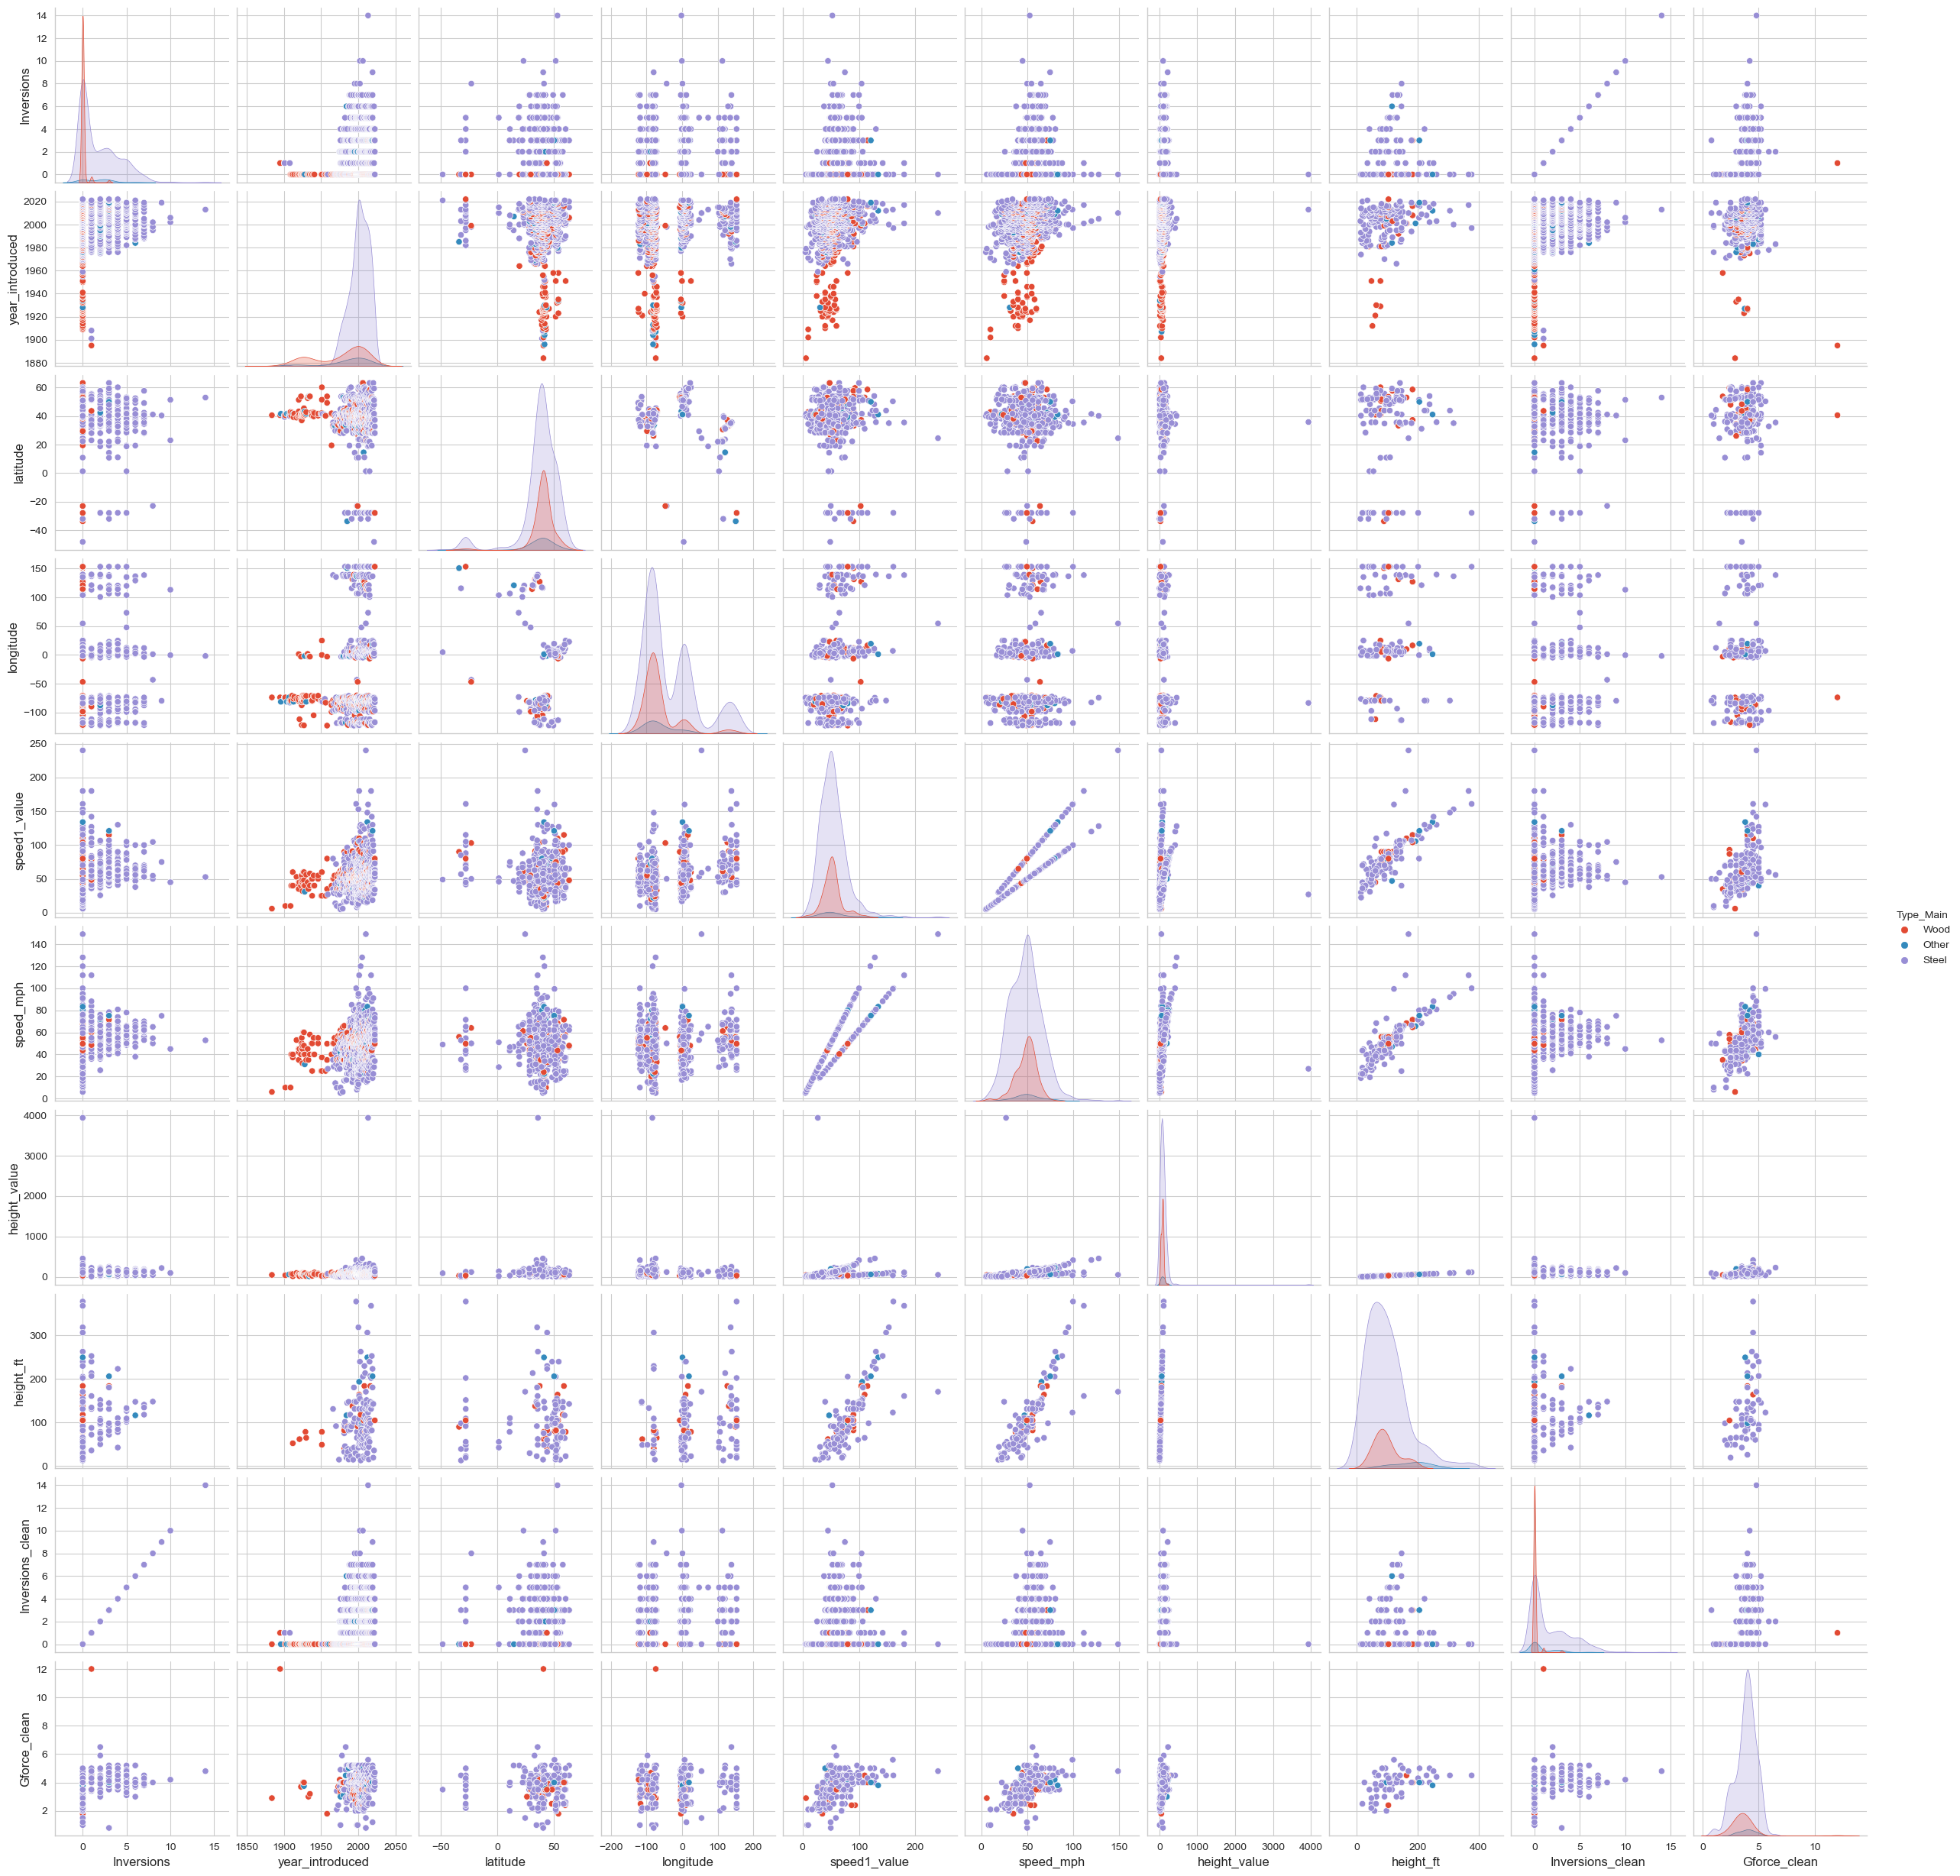

In [160]:
plt.close();
sns.set_style("whitegrid")
sns.pairplot(df,hue="Type_Main" );
plt.show()